In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [62]:
df = pd.read_csv("../4x4matrix.csv", index_col=0)

/Users/shimotori/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [63]:
df[df.iloc[:,16] <= 1] = 0
df[df >= 2] = 1
df

,p_11,p_12,p_13,p_14,p_21,p_22,p_23,p_24,p_31,p_32,...,p_44,q_11,q_12,q_13,q_21,q_22,q_23,q_31,q_32,q_33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
class AE():
    def __init__(self,input_data_path="../4x4matrix.csv", optimizer='rmsprop', loss='binary_crossentropy'):
        #self.p_matrix = np.array(pd.read_csv(input_data_path, index_col=0).iloc[:,0:16])
        #self.q_matrix = np.array(pd.read_csv(input_data_path, index_col=0).iloc[:,16:])
        self.p_matrix = np.array(df.iloc[:,0:16])
        self.q_matrix = np.array(df.iloc[:,16:])
        self.optimizer = optimizer
        self.model = Sequential()
        self.model.add( Dense(16, activation = 'relu', input_dim = 9) )
        self.model.add( Dense(16, activation = 'relu') )
        self.model.add( Dense(16, activation = 'relu') )
        self.model.compile(optimizer = 'rmsprop',
                           loss='binary_crossentropy',
                           metrics = ['accuracy'])
        
    def fit(self, epochs='4', batch_size='256'):
        self.model.fit(self.q_matrix, self.p_matrix,
                      epochs = epochs,
                      batch_size = batch_size,
                      validation_data = (self.q_matrix, self.p_matrix))

In [68]:
autoencoder = AE()

In [72]:
autoencoder.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 16)                160       
_________________________________________________________________
dense_55 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_56 (Dense)             (None, 16)                272       
Total params: 704
Trainable params: 704
Non-trainable params: 0
_________________________________________________________________


In [70]:
autoencoder.fit(epochs = 3, batch_size=256)

Train on 1048576 samples, validate on 1048576 samples
Epoch 1/3
1048576/1048576 [==============================] - 15s 15us/step - loss: 0.4145 - acc: 0.9039 - val_loss: 0.4046 - val_acc: 0.9079
Epoch 2/3
1048576/1048576 [==============================] - 15s 14us/step - loss: 0.4043 - acc: 0.9082 - val_loss: 0.4043 - val_acc: 0.9074
Epoch 3/3
1048576/1048576 [==============================] - 15s 14us/step - loss: 0.4039 - acc: 0.9086 - val_loss: 0.4039 - val_acc: 0.9087


In [ ]:
test_img = np.array([1,1,1,1,1,1,0,0,0])
preds = autoencoder.model.predict(test_img)



In [35]:
input_data_path="../4x4matrix.csv"

p_matrix = np.array(pd.read_csv(input_data_path, index_col=0).iloc[:,0:16])
q_matrix = np.array(pd.read_csv(input_data_path, index_col=0).iloc[:,16:])
model = Sequential()
model.add( Dense(16, activation = 'relu', input_dim = 9) )
model.add( Dense(16, activation = 'relu') )
model.add( Dense(16, activation = 'relu') )
model.compile(optimizer = 'rmsprop',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [8]:
print(p_matrix.shape, q_matrix.shape)

(1048576, 16) (1048576, 9)


In [34]:
model.fit(q_matrix, p_matrix,
          batch_size=256,
          epochs = 3
         )

Epoch 1/3
1048576/1048576 [==============================] - 11s 10us/step - loss: 0.7108 - acc: 0.6362
Epoch 2/3
1048576/1048576 [==============================] - 10s 10us/step - loss: 0.6038 - acc: 0.6661
Epoch 3/3
1048576/1048576 [==============================] - 10s 10us/step - loss: 0.6036 - acc: 0.6669


In [16]:
score = model.evaluate(q_matrix, p_matrix, batch_size=256)

1048576/1048576 [==============================] - 4s 4us/step


In [17]:
print(score)

[0.5833174546132796, 0.6885582804679871]


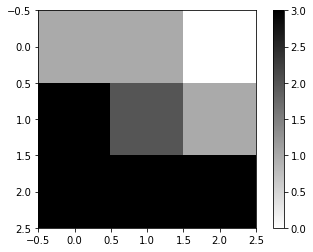

In [47]:
image = np.array(df.iloc[:,16:].iloc[53230]).reshape(3,3)
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()

In [71]:
print((2 ** 9)/(2 ** 16 ))

0.0078125


In [6]:
keras.Sequential?